In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import functions_with_wscCoverage 

import pandas as pd
import seaborn as sns
from matplotlib import cm

sns.set_style("whitegrid")

plt.rcParams.update({'font.size': 14})
cmap = cm.get_cmap('tab20c')
y1_color = cmap(1/20) #bleu 
y2_color = cmap(6/20) #orange
y3_color = cmap(9/20) #vert
y4_color = cmap(14/20) #violet
#palette = ["cornflowerblue",y2_color,"lightpink"] 
palette = [y1_color,y2_color,y3_color,y4_color]

/var/folders/wb/j_66l1b92d580qv2dsc3kpmr0000gp/T/ipykernel_42218/342461727.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20c')


# Simulated data

/var/folders/wb/j_66l1b92d580qv2dsc3kpmr0000gp/T/ipykernel_42218/2441693619.py:25: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(data=df, x="X1", y="X2",hue="labels",palette=palette)


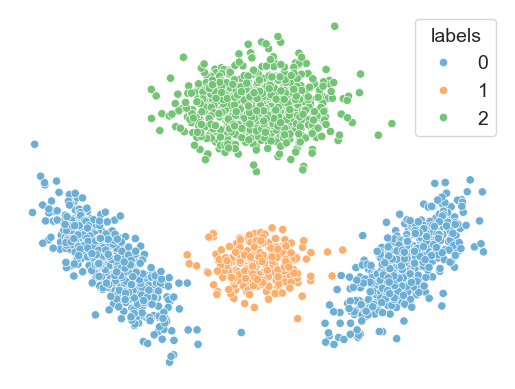

In [2]:


def sample_XY(n = 800):
    S1 = np.array([[4,-3],[-3,4]])
    S2 = np.array([[4,3],[3,4]])
    S3 = np.array([[3,0],[0,1]])
    nu1,nu2,nu3,nu4 = int(n*2/8),int(n*2/8),int(n*1/8),int(n*3/8)
    Y1 = np.random.multivariate_normal([-10,0],S1,nu1)
    Y2 = np.random.multivariate_normal([10,0],S2,nu2)
    Y3 = np.random.multivariate_normal([0,0],S3,nu3)
    Y4 = np.random.multivariate_normal([0,10],2*S3,nu4)
    X  = np.concatenate([Y1,Y2,Y3,Y4])
    
    Y = np.concatenate([ np.repeat(0,Y1.shape[0]),np.repeat(0,Y2.shape[0]), np.repeat(1,Y3.shape[0]), np.repeat(2,Y4.shape[0]) ])
    idx = np.arange(len(X)) 
    np.random.shuffle(idx) 
    X = X[idx] 
    Y = Y[idx] 
    return(X,Y) 


X,Y = sample_XY(n=2000)

sns.set_style("white")
df = pd.DataFrame(X,columns=["X1","X2"]) 
df["labels"] = Y 
sns.scatterplot(data=df, x="X1", y="X2",hue="labels",palette=palette) 
plt.axis("off")  
plt.savefig("Figures/Classif_SimuData.pdf", format="pdf",bbox_inches="tight") 

In [3]:
np.random.seed(62)

#### REPEAT EXPERIMENTS 
alpha = 0.9 
clf = QuadraticDiscriminantAnalysis()
N = 15 # number of repeated experiments 
resultats = []
resultats_condit_to_y = []
for rep in range(N):
    print(rep)
    X,Y = sample_XY(n=3000)
    K = len(np.unique(Y))

    # SPLIT TRAIN / CALIB / TEST 
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
    X_test, X_cal, y_test, y_cal = train_test_split(X_test, y_test, test_size=0.5)

    # LEARN CLASSIFIER AND GET SCORES FOR CALIBRATION DATA 
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

    calib_parameters = functions_with_wscCoverage.CalibAllMetrics(X_cal,y_cal,clf, alpha,K)

    # TEST 
    res_OTCP,res_IP,res_MS, res_APS = functions_with_wscCoverage.TestAllMetrics(X_test,y_test,clf,calib_parameters,K)
    resultats.append( np.array(res_OTCP).tolist()+["OTCP"] )
    resultats.append( np.array(res_IP).tolist()+["IP"] )
    resultats.append( np.array(res_MS).tolist()+["MS"] )
    resultats.append( np.array(res_APS).tolist()+["APS"] )

    for y in range(K):
        X_test_y = X_test[y_test==y]
        y_test_y = y_test[y_test==y]
        res_OTCP,res_IP,res_MS, res_APS = functions_with_wscCoverage.TestAllMetrics(X_test_y,y_test_y,clf,calib_parameters,K)
        resultats_condit_to_y.append( np.array(res_OTCP).tolist()+["OTCP"]+["{}".format(y)] )
        resultats_condit_to_y.append( np.array(res_IP).tolist()+["IP"]+["{}".format(y)] )
        resultats_condit_to_y.append( np.array(res_MS).tolist()+["MS"]+["{}".format(y)] )
        resultats_condit_to_y.append( np.array(res_APS).tolist()+["APS"]+["{}".format(y)] )

resultats = pd.DataFrame(resultats,columns=["Coverage","Efficiency","Informativeness","WSC-Coverage","Method"]) 
resultats_condit_to_y = pd.DataFrame(resultats_condit_to_y,columns=["Coverage","Efficiency","Informativeness","WSC-Coverage","Method","Label"]) 


0
0.96


100%|██████████| 1000/1000 [00:00<00:00, 1124.45it/s]


1
0.9626666666666667


100%|██████████| 1000/1000 [00:00<00:00, 1078.72it/s]


2
0.9613333333333334


100%|██████████| 1000/1000 [00:00<00:00, 1061.26it/s]


3
0.9786666666666667


100%|██████████| 1000/1000 [00:00<00:00, 1114.83it/s]


4
0.9586666666666667


100%|██████████| 1000/1000 [00:00<00:00, 1081.94it/s]


5
0.9626666666666667


100%|██████████| 1000/1000 [00:00<00:00, 1093.74it/s]


6
0.964


100%|██████████| 1000/1000 [00:02<00:00, 455.74it/s]


7
0.96


100%|██████████| 1000/1000 [00:01<00:00, 503.20it/s]


8
0.9653333333333334


100%|██████████| 1000/1000 [00:02<00:00, 493.41it/s]


9
0.9493333333333334


100%|██████████| 1000/1000 [00:00<00:00, 1022.07it/s]


10
0.968


100%|██████████| 1000/1000 [00:01<00:00, 656.73it/s]


11
0.9706666666666667


100%|██████████| 1000/1000 [00:00<00:00, 1106.32it/s]


12
0.9693333333333334


100%|██████████| 1000/1000 [00:00<00:00, 1073.68it/s]


13
0.9653333333333334


100%|██████████| 1000/1000 [00:00<00:00, 1142.01it/s]


14
0.964


100%|██████████| 1000/1000 [00:00<00:00, 1161.54it/s]


<Figure size 640x480 with 0 Axes>

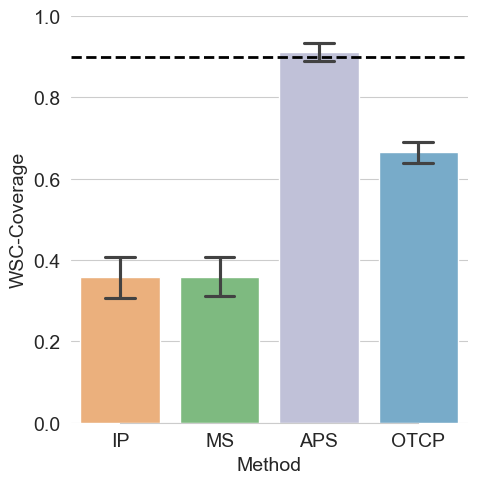

<Figure size 640x480 with 0 Axes>

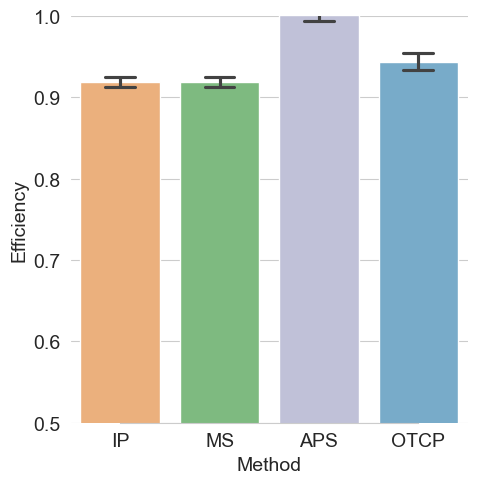

<Figure size 640x480 with 0 Axes>

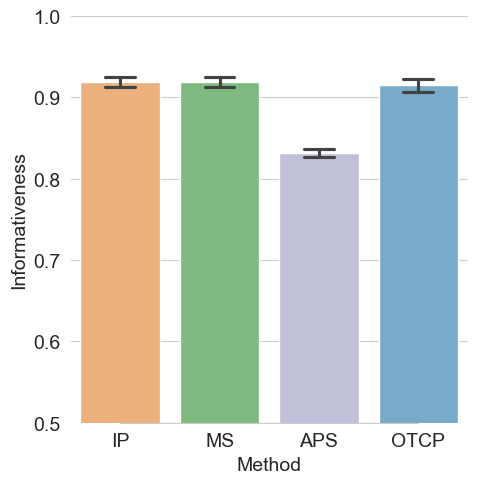

In [4]:
sns.set_style("whitegrid") 


plt.figure()
g =sns.catplot( 
    data=resultats,  kind="bar",
    x="Method", y="WSC-Coverage", hue="Method", palette=[y1_color,y2_color,y3_color,y4_color],height=5,width=0.8,capsize=0.3,aspect=1,order=["IP","MS","APS","OTCP"]
)   
g.refline(y=alpha, color='black',linestyle="dashed",linewidth=2)
plt.ylim(0,1)
sns.despine(trim=True, left=True)
plt.savefig("Figures/Classif_SimuData_WSCcoverage.pdf", format="pdf",bbox_inches="tight")
plt.show()

plt.figure()
g =sns.catplot( 
    data=resultats,  kind="bar",
    x="Method", y="Efficiency", hue="Method", palette=[y1_color,y2_color,y3_color,y4_color],height=5,width=0.8,capsize=0.3,aspect=1,order=["IP","MS","APS","OTCP"]
)   
plt.ylabel("Efficiency") 
plt.ylim(0.5,1)
sns.despine(trim=True, left=True)
plt.savefig("Figures/Classif_SimuData_efficiency.pdf", format="pdf",bbox_inches="tight")
plt.show()

plt.figure()
g =sns.catplot( 
    data=resultats,  kind="bar",
    x="Method", y="Informativeness", hue="Method", 
    palette=[y1_color,y2_color,y3_color,y4_color],height=5,width=0.8,capsize=0.3,aspect=1,order=["IP","MS","APS","OTCP"]
)   
plt.ylabel("Informativeness") 
plt.ylim(0.5,1)
sns.despine(trim=True, left=True)
plt.savefig("Figures/Classif_SimuData_informativeness.pdf", format="pdf",bbox_inches="tight")
plt.show()